![](https://thumbs.gfycat.com/CreepyInbornGrayling-size_restricted.gif)
# Introduction
Weather plays a key role in many times of human history. Kublai Khan’s attempted conquest of Japan failed terribly when the invasion fleet was wiped out by a typhoon. Over the years, the role of weather becomes more significant with the invention of heavy armours vehicles brought to battle. Land and sea invasions were heavily dependent on the weather as bombers and air-strikes have to be aborted during bad weather conditions. Meteorologists in the 1940s also lacked modern devices like satelite imagery devices to forcast weather predictions days in advance. This means that sea convoys are heavily dependent on to gather valuable meteorological data.

In this dataset, we analyse the aerial bombing operations dataset which explore the weather condition during the D-Day landing. 

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

In [3]:
def overview():
    data = pd.read_csv("Weather.csv")
    # Print the first 5 lines of data
    print("First 5 lines of data \n\n")
    print(data.head())
    
    # Print data type
    print("\n\n\nDatatype\n")
    print(data.dtypes)
    
    # Print number of null values 
    print("\n\n\nNumber of null values\n")
    print(data.isnull().sum())
    
    # Print data summary
    print("\n\n\nData summary\n")
    print(data.describe())
    
    # Print data shape
    print("\n\n\nData shape\n")
    print("Data has {} rows and {} columns".format(data.shape[0], data.shape[1]))
   
    return data

data = overview()

C:\Users\mailu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


First 5 lines of data 


     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 Na

## Dealing with NaN values
- We have a total of 119040 rows of data. We will only remove the affected rows if < 5% of the values are NaN. This means we can only remove NaN values if the total counts are below 5952.
- For columns with significantly huge amount of NaN values, we will remove it totally since we can't replace the values.

In [4]:
# Dropping NaN rows 
data = data.dropna(subset = ['Snowfall', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'])

# Dropping redundant column
data = data.drop(columns = ['PRCP'])

# Dropping NaN columns 
data = data.dropna(axis = 'columns')

# Taking a look at whats left
data.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64

## Dealing with outliers
- To deal with outliers, we use Z-score.
- A Z-score is a numerical measurement used in statistics of a value’s relationship to the mean (average) of a group of values, measured in terms of standard deviations from the mean.
    - If a Z-score is 0, it indicates that the data point’s score is identical to the mean score.
    - A Z-score of 1.0 would indicate a value that is one standard deviation from the mean.
    - Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.
- In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [5]:
# Create a function to separate out numerical and categorical data
    ## Using this function to ensure that all non-numerical in a numerical column
    ## and non-categorical in a categorical column is annotated
def cat_variable(df):
    return list(df.select_dtypes(include = ['category', 'object']))

def num_variable(df):
    return list(df.select_dtypes(exclude = ['category', 'object']))

categorical_variable = cat_variable(data)
numerical_variable = num_variable(data)

# Create a function to process outlier data
def outlier(data):
    z = np.abs(stats.zscore(data[numerical_variable]))
    z_data = data[(z < 3).all(axis=1)] # Remove any outliers with Z-score > 3 or < -3
    return z_data

data = outlier(data)

## Removing meaningless data from columns 

In [6]:
# Removing non-numeric data and cnverting date to datetime format
data['Precip'] = pd.to_numeric(data['Precip'], errors='coerce')
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.applymap(np.isreal)

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA,SNF,Year
0,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
119036,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
119037,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
119038,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True


## Dealing with NaN values again
- We have 15549 NaN values that were converted in the previous steps. 
- We will use ffill() and bbfill() to replace NaN

In [7]:
print('Before cleaning: \n\n{}'.format(data.isnull().sum()))

data = data.fillna(method='ffill').fillna(method='bfill')

print('\nAfter cleaning: \n\n{}'.format(data.isnull().sum()))

Before cleaning: 

STA             0
Date            0
Precip      15549
MaxTemp         0
MinTemp         0
MeanTemp        0
Snowfall        0
YR              0
MO              0
DA              0
MAX             0
MIN             0
MEA             0
SNF             0
Year            0
dtype: int64

After cleaning: 

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
MAX         0
MIN         0
MEA         0
SNF         0
Year        0
dtype: int64


## Temperature between 1942-1945

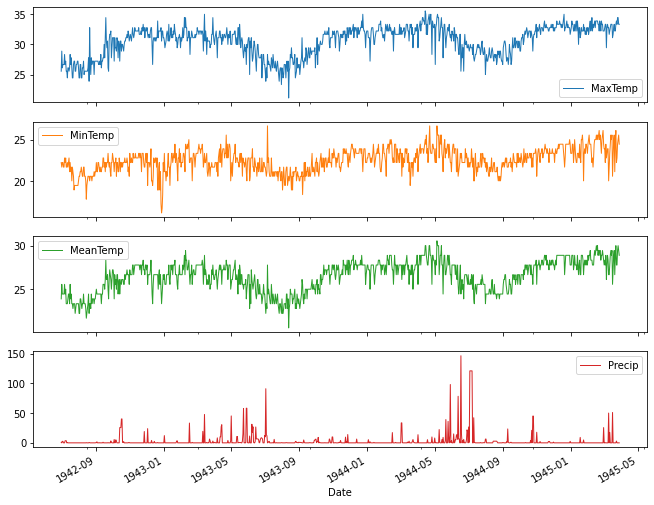

In [8]:
# Convert year to datetime format
data = data[:][:1000] # We take in the first 1000 data since we do not want to cluster bomb the whole plot. 
data['Date'] = pd.to_datetime(data['Date'])

# Indexing the year
data = data.set_index('Date')
axes = data[["MaxTemp", "MinTemp", "MeanTemp", "Precip"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

We can see that the occurance of precipitation lower the mean temperature. 